In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime

In [7]:
df = pd.read_csv("MachineLearning.csv")

In [8]:
df

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
0,547960,2015-01-01,Quebec,101,"Total, all occupations","Type of work, all types",60480.0,NaN
1,547963,2015-01-01,Quebec,101,"Total, all occupations",Full-time,45455.0,NaN
2,876736,2015-01-01,Saskatchewan,101,"Total, all occupations","Type of work, all types",14330.0,NaN
3,876739,2015-01-01,Saskatchewan,101,"Total, all occupations",Full-time,10420.0,NaN
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0,NaN
...,...,...,...,...,...,...,...,...
10704,55124776,2024-04-01,Nunavut,101,"Total, all occupations","Type of work, all types",575.0,NaN
10705,55124779,2024-04-01,Nunavut,101,"Total, all occupations",Full-time,455.0,NaN
10706,55181035,2024-04-01,Nunavut,6,Sales and service occupations,"Type of work, all types",135.0,NaN
10707,55181038,2024-04-01,Nunavut,6,Sales and service occupations,Full-time,95.0,NaN


In [12]:
df.isnull().sum()

idML                       0
ref_date                   0
geo                        0
noc_code                   0
noc_desc                   0
job_char                   0
total_vacancies            0
predicted_vacancies    10709
dtype: int64

In [17]:
df.drop("predicted_vacancies", axis=1, inplace=True)

In [18]:
df.head()

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies
0,547960,2015-01-01,Quebec,101,"Total, all occupations","Type of work, all types",60480.0
1,547963,2015-01-01,Quebec,101,"Total, all occupations",Full-time,45455.0
2,876736,2015-01-01,Saskatchewan,101,"Total, all occupations","Type of work, all types",14330.0
3,876739,2015-01-01,Saskatchewan,101,"Total, all occupations",Full-time,10420.0
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0


In [19]:
df.isnull().sum()

idML               0
ref_date           0
geo                0
noc_code           0
noc_desc           0
job_char           0
total_vacancies    0
dtype: int64

In [21]:
data['ref_date'] = pd.to_datetime(data['ref_date'], format='%Y-%m-%d') 

In [22]:
df.head()

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies
0,547960,2015-01-01,Quebec,101,"Total, all occupations","Type of work, all types",60480.0
1,547963,2015-01-01,Quebec,101,"Total, all occupations",Full-time,45455.0
2,876736,2015-01-01,Saskatchewan,101,"Total, all occupations","Type of work, all types",14330.0
3,876739,2015-01-01,Saskatchewan,101,"Total, all occupations",Full-time,10420.0
4,1534288,2015-04-01,Canada,101,"Total, all occupations","Type of work, all types",452315.0


In [23]:
train_data = data[(data['ref_date'] >= '2015-01-01') & (data['ref_date'] <= '2023-12-31')]
train_data = train_data[['ref_date', 'total_vacancies']]

In [24]:
train_data.set_index('ref_date', inplace=True)

In [25]:
train_data.isna().sum()

total_vacancies    0
dtype: int64

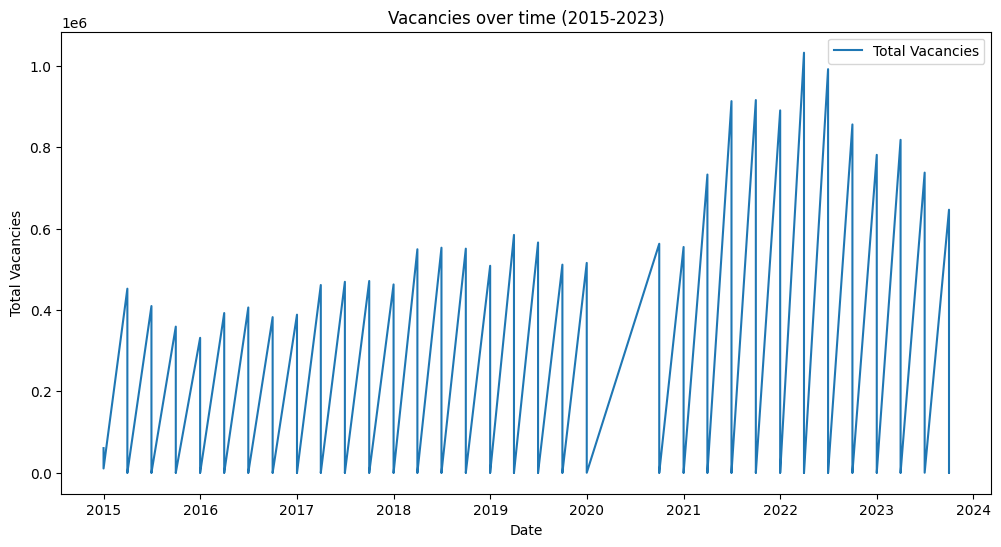

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['total_vacancies'], label='Total Vacancies')
plt.title('Vacancies over time (2015-2023)')
plt.xlabel('Date')
plt.ylabel('Total Vacancies')
plt.legend()
plt.show()

In [27]:
sarimax_model = sm.tsa.statespace.SARIMAX(
    train_data['total_vacancies'],
    order=(1, 1, 1),  # (p, d, q) - AR, differencing, MA components
    seasonal_order=(1, 1, 1, 12),  # Seasonal components (P, D, Q, S)
    enforce_stationarity=False,
    enforce_invertibility=False
)

C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
sarimax_results = sarimax_model.fit(disp=False)

In [29]:
# Forecasting for 2024 (for the same frequency as training data)
forecast_steps = 12  # Number of months in 2024 (you can adjust based on your data frequency)
forecast = sarimax_results.get_forecast(steps=forecast_steps)


C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Gurmanjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
# Get the predicted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

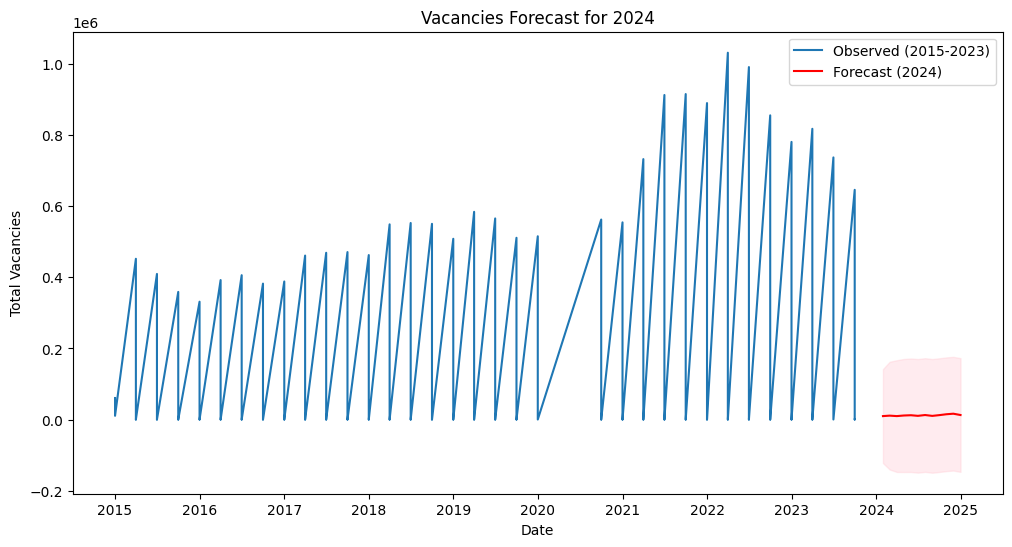

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['total_vacancies'], label='Observed (2015-2023)')
plt.plot(pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M'), forecast_values, label='Forecast (2024)', color='red')
plt.fill_between(pd.date_range(start='2024-01-01', periods=forecast_steps, freq='M'), 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Vacancies Forecast for 2024')
plt.xlabel('Date')
plt.ylabel('Total Vacancies')
plt.legend()
plt.show()

In [32]:
forecast_values

10087     9581.686284
10088    10861.310839
10089     9590.260855
10090    11243.975283
10091    12005.616439
10092    10295.704270
10093    12588.185877
10094    10188.185172
10095    12268.670708
10096    14776.585566
10097    16311.511180
10098    12620.241968
Name: predicted_mean, dtype: float64

In [36]:

ad = pd.read_csv('MachineLearning.csv', parse_dates=['ref_date'])

# Step 2: Filter for actual values from 2024 (if the data includes 2015-2023 as well)
ad = actual_data_2024[actual_data_2024['ref_date'].dt.year == 2024]


In [37]:
ad

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
10087,52165792,2024-01-01,Canada,101,"Total, all occupations","Type of work, all types",601755.0,NaN
10088,52165795,2024-01-01,Canada,101,"Total, all occupations",Full-time,452650.0,NaN
10089,52165798,2024-01-01,Canada,101,"Total, all occupations",Part-time,149105.0,NaN
10090,52165925,2024-01-01,Canada,0,Legislative and senior management occupations,"Type of work, all types",1285.0,NaN
10091,52165928,2024-01-01,Canada,0,Legislative and senior management occupations,Full-time,1195.0,NaN
...,...,...,...,...,...,...,...,...
10704,55124776,2024-04-01,Nunavut,101,"Total, all occupations","Type of work, all types",575.0,NaN
10705,55124779,2024-04-01,Nunavut,101,"Total, all occupations",Full-time,455.0,NaN
10706,55181035,2024-04-01,Nunavut,6,Sales and service occupations,"Type of work, all types",135.0,NaN
10707,55181038,2024-04-01,Nunavut,6,Sales and service occupations,Full-time,95.0,NaN


In [38]:
forecasted_values = [9581.686284, 10861.310839, 9590.260855, 11243.975283, 12005.616439, 10295.704270, 12588.185877, 10188.185172, 12268.670708, 14776.585566, 16311.511180, 12620.241968]  # Example forecasted values


In [42]:
actual = actual_data_2024.head(len(forecasted_values)) 

In [43]:
actual

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
10087,52165792,2024-01-01,Canada,101,"Total, all occupations","Type of work, all types",601755.0,NaN
10088,52165795,2024-01-01,Canada,101,"Total, all occupations",Full-time,452650.0,NaN
10089,52165798,2024-01-01,Canada,101,"Total, all occupations",Part-time,149105.0,NaN
10090,52165925,2024-01-01,Canada,0,Legislative and senior management occupations,"Type of work, all types",1285.0,NaN
10091,52165928,2024-01-01,Canada,0,Legislative and senior management occupations,Full-time,1195.0,NaN
10092,52167255,2024-01-01,Canada,1,"Business, finance and administration occupations","Type of work, all types",78850.0,NaN
10093,52167258,2024-01-01,Canada,1,"Business, finance and administration occupations",Full-time,69615.0,NaN
10094,52167261,2024-01-01,Canada,1,"Business, finance and administration occupations",Part-time,9240.0,NaN
10095,52179890,2024-01-01,Canada,2,Natural and applied sciences and related occup...,"Type of work, all types",48615.0,NaN
10096,52179893,2024-01-01,Canada,2,Natural and applied sciences and related occup...,Full-time,45830.0,NaN


In [44]:
actual['predicted_vacancies'] = forecasted_values

In [47]:
actual

,idML,ref_date,geo,noc_code,noc_desc,job_char,total_vacancies,predicted_vacancies
10087,52165792,2024-01-01,Canada,101,"Total, all occupations","Type of work, all types",601755.0,9581.686284
10088,52165795,2024-01-01,Canada,101,"Total, all occupations",Full-time,452650.0,10861.310839
10089,52165798,2024-01-01,Canada,101,"Total, all occupations",Part-time,149105.0,9590.260855
10090,52165925,2024-01-01,Canada,0,Legislative and senior management occupations,"Type of work, all types",1285.0,11243.975283
10091,52165928,2024-01-01,Canada,0,Legislative and senior management occupations,Full-time,1195.0,12005.616439
10092,52167255,2024-01-01,Canada,1,"Business, finance and administration occupations","Type of work, all types",78850.0,10295.704270
10093,52167258,2024-01-01,Canada,1,"Business, finance and administration occupations",Full-time,69615.0,12588.185877
10094,52167261,2024-01-01,Canada,1,"Business, finance and administration occupations",Part-time,9240.0,10188.185172
10095,52179890,2024-01-01,Canada,2,Natural and applied sciences and related occup...,"Type of work, all types",48615.0,12268.670708
10096,52179893,2024-01-01,Canada,2,Natural and applied sciences and related occup...,Full-time,45830.0,14776.585566


In [48]:
mae = mean_absolute_error(actual['total_vacancies'], ['predicted_vacancies'])
rmse = np.sqrt(mean_squared_error(actual['total_vacancies'], actual['predicted_vacancies']))

ValueError: Found input variables with inconsistent numbers of samples: [12, 1]